In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv(r"../data/train.csv")
train_df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [3]:
test_df=pd.read_csv(r"../data/test.csv")
test_df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [4]:
train_df.shape,test_df.shape

((440833, 12), (64374, 12))

In [5]:
train_df.shape[0]+test_df.shape[0]

505207

In [6]:
df=pd.concat([train_df,test_df],axis=0)
df.shape

(505207, 12)

In [7]:
df.shape

(505207, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [9]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [10]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [11]:
df[df['CustomerID'].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df1=df.dropna()
df1=df1.drop('CustomerID',axis=1)

In [13]:
df1.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [14]:
churn_count = df1[df1['Churn'] == 1].shape[0]
nonchurn_count = df1[df1['Churn'] == 0].shape[0]
churn_count,nonchurn_count

(280492, 224714)

<Axes: xlabel='Gender', ylabel='count'>

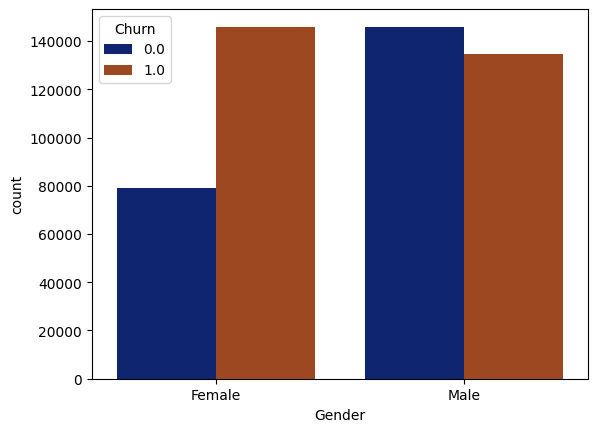

In [15]:
sns.countplot(x=df1['Gender'],hue=df1['Churn'],palette='dark')

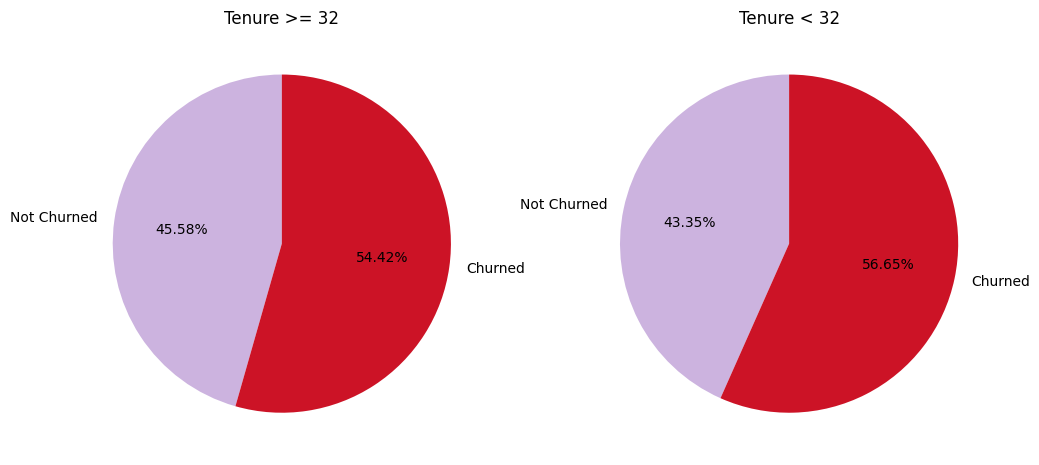

In [16]:
import matplotlib.pyplot as plt

counts_ge32 = df1[df1['Tenure'] >= 32].groupby('Churn')['Churn'].count()
counts_lt32 = df1[df1['Tenure'] < 32].groupby('Churn')['Churn'].count()

labels = ['Not Churned', 'Churned']
colors = ['#ccb3df', '#cc1326']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(counts_ge32, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
axes[0].set_title('Tenure >= 32')

axes[1].pie(counts_lt32, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
axes[1].set_title('Tenure < 32')

plt.show()


In [17]:
age_quartiles = pd.qcut(df1['Age'], 4)
print(age_quartiles.value_counts())


Age
(29.0, 40.0]      136823
(17.999, 29.0]    127573
(40.0, 49.0]      123011
(49.0, 65.0]      117799
Name: count, dtype: int64


In [18]:
import pandas as pd

# Create age quartiles
df1['Age_Quartile'] = pd.qcut(df1['Age'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Check the distribution
df1['Age_Quartile'].value_counts()


Age_Quartile
Q2    136823
Q1    127573
Q3    123011
Q4    117799
Name: count, dtype: int64

In [19]:
age_churn_counts = df1.groupby('Age_Quartile')['Churn'].value_counts().unstack(fill_value=0)

age_churn_perc = age_churn_counts.div(age_churn_counts.sum(axis=1), axis=0) * 100
age_churn_perc


Churn,0.0,1.0
Age_Quartile,,
Q1,45.827095,54.172905
Q2,54.262076,45.737924
Q3,58.998789,41.001211
Q4,16.496744,83.503256


<Figure size 1000x600 with 0 Axes>

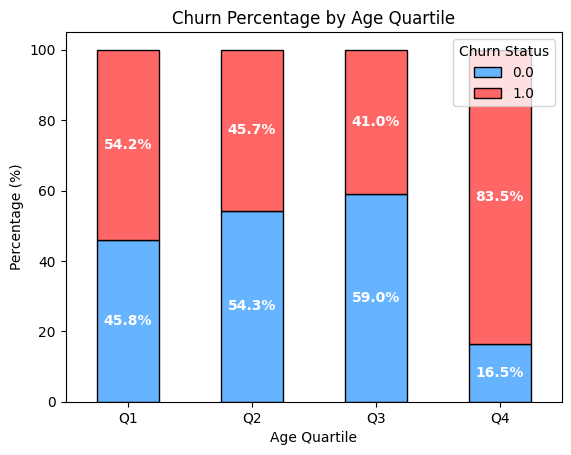

In [20]:
plt.figure(figsize=(10,6))
quartile_labels = ['Q1','Q2','Q3','Q4']
age_churn_perc.plot(kind='bar', stacked=True, color=['#66b3ff','#ff6666'], edgecolor='black')

plt.ylabel('Percentage (%)')
plt.xlabel('Age Quartile')
plt.title('Churn Percentage by Age Quartile')
plt.legend(title='Churn Status', loc='upper right')
plt.xticks(ticks=range(len(quartile_labels)), labels=quartile_labels, rotation=0)

for i, row in enumerate(age_churn_perc.itertuples(index=False)):
    bottom = 0
    for value in row:
        plt.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        bottom += value

plt.show()


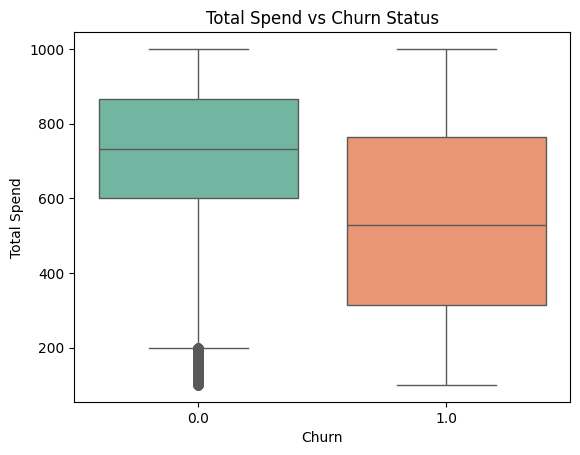

In [21]:
sns.boxplot(x='Churn', y='Total Spend', data=df1,palette='Set2')
plt.title('Total Spend vs Churn Status')
plt.show()


<Axes: xlabel='Churn', ylabel='Payment Delay'>

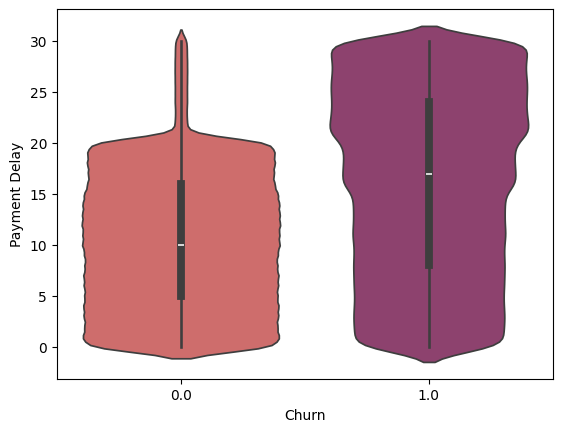

In [22]:
sns.violinplot(x='Churn',y='Payment Delay',data=df1,palette='flare')

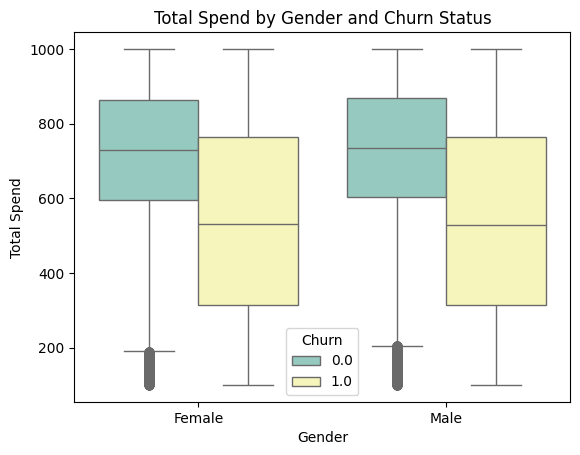

In [23]:
sns.boxplot(
    x='Gender',
    y='Total Spend',
    hue='Churn',
    data=df1,
    palette='Set3'
)
plt.title('Total Spend by Gender and Churn Status')
plt.show()


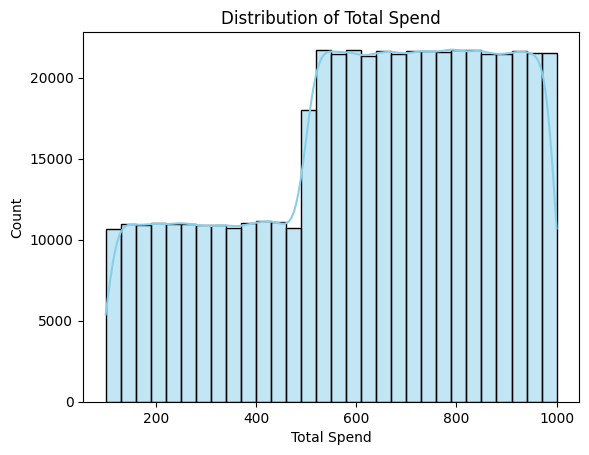

In [24]:
sns.histplot(df['Total Spend'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Spend')
plt.show()


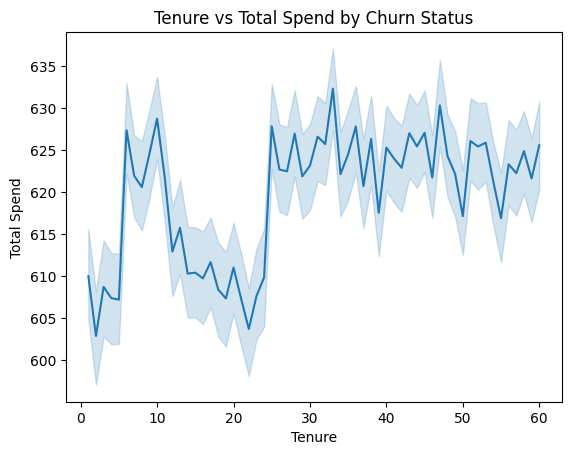

In [25]:
sns.lineplot(x='Tenure', y='Total Spend', data=df1,palette='muted')
plt.title('Tenure vs Total Spend by Churn Status')
plt.show()


<Axes: xlabel='Churn', ylabel='Support Calls'>

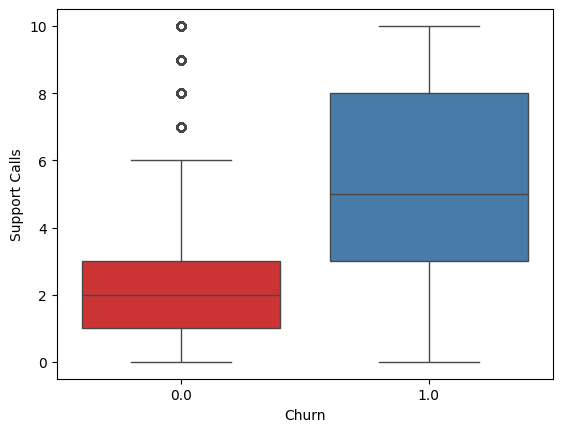

In [26]:
sns.boxplot(x='Churn',y='Support Calls',data=df1,palette='Set1')

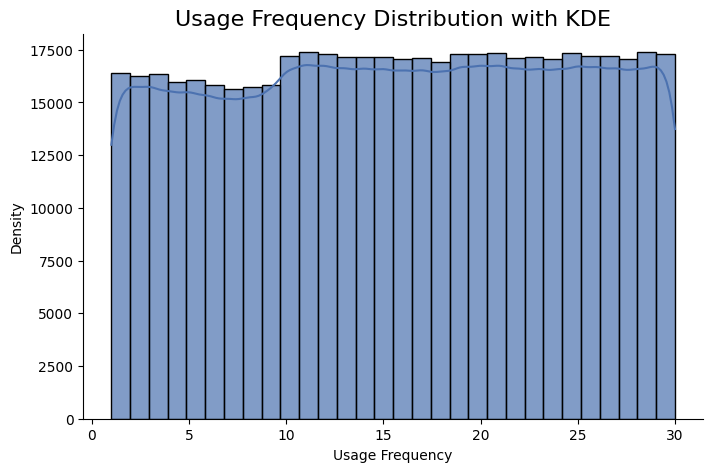

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(x='Usage Frequency', data=df1, bins=30, color='#4C72B0', kde=True, alpha=0.7)
plt.title('Usage Frequency Distribution with KDE', fontsize=16)
plt.xlabel('Usage Frequency')
plt.ylabel('Density')
sns.despine()
plt.show()


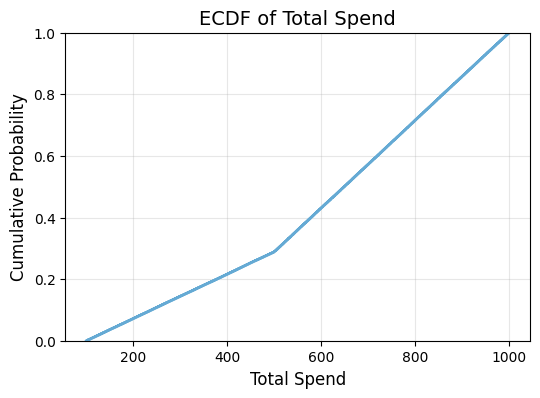

In [28]:
plt.figure(figsize=(6,4))
sns.ecdfplot(df1['Total Spend'], color='#65aad4', linewidth=2)
plt.title('ECDF of Total Spend', fontsize=14)
plt.xlabel('Total Spend', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


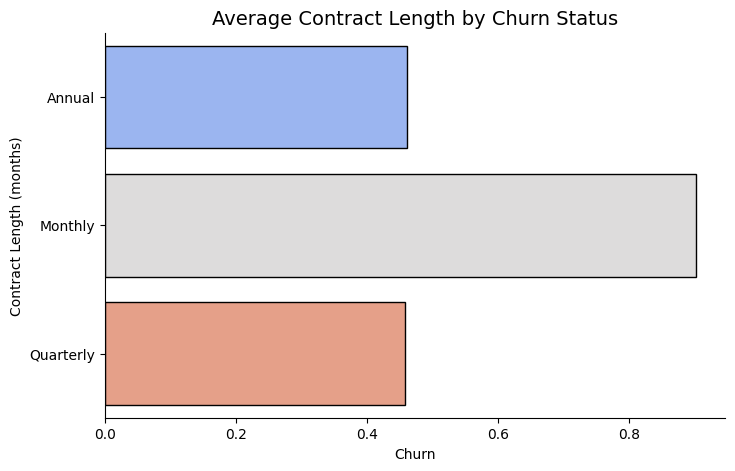

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Churn', y='Contract Length', data=df1,
            palette='coolwarm', edgecolor='black', ci=None)
plt.title('Average Contract Length by Churn Status', fontsize=14)
plt.ylabel('Contract Length (months)')
plt.xlabel('Churn')
sns.despine()
plt.show()


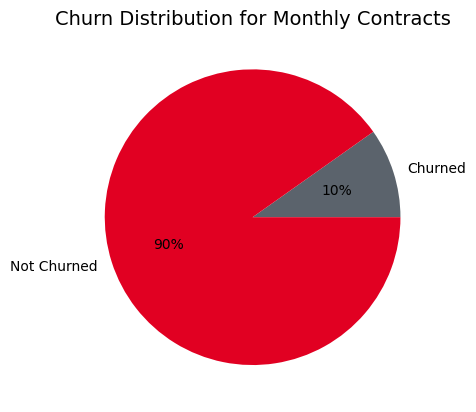

In [30]:
plt.pie(df1[df1['Contract Length']=='Monthly'].groupby('Churn')['Churn'].count(),labels=['Churned','Not Churned'],autopct='%0.0f%%',colors=["#5B636C","#E10022"])
plt.title('Churn Distribution for Monthly Contracts', fontsize=14)
plt.show()

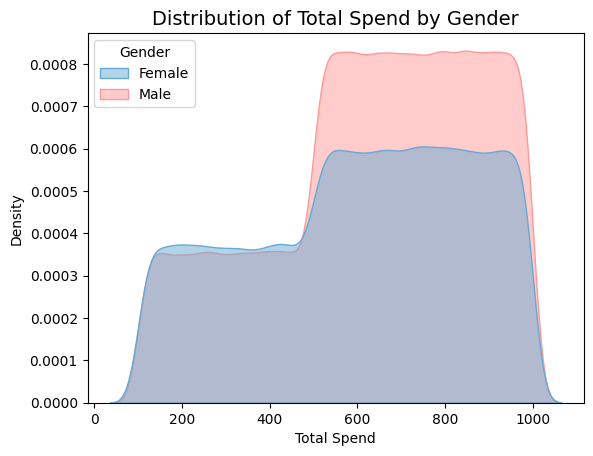

In [31]:
sns.kdeplot(data=df1, x='Total Spend', hue='Gender', fill=True, alpha=0.5, palette=['#65aad4','#ff9999'])
plt.title('Distribution of Total Spend by Gender', fontsize=14)
plt.show()


<Axes: >

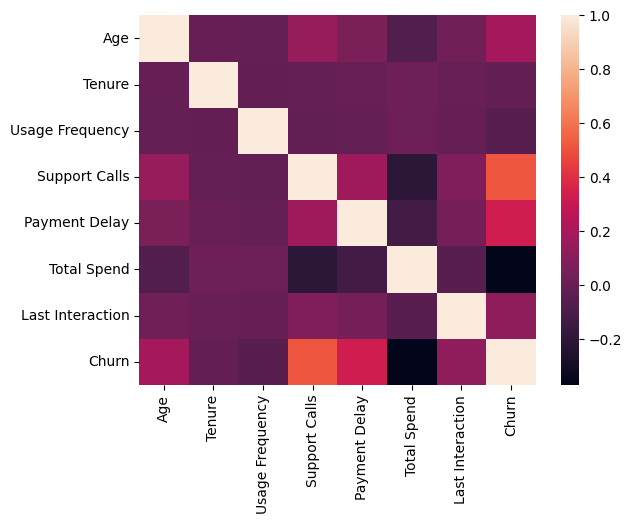

In [32]:
sns.heatmap(df1.select_dtypes('float').corr())

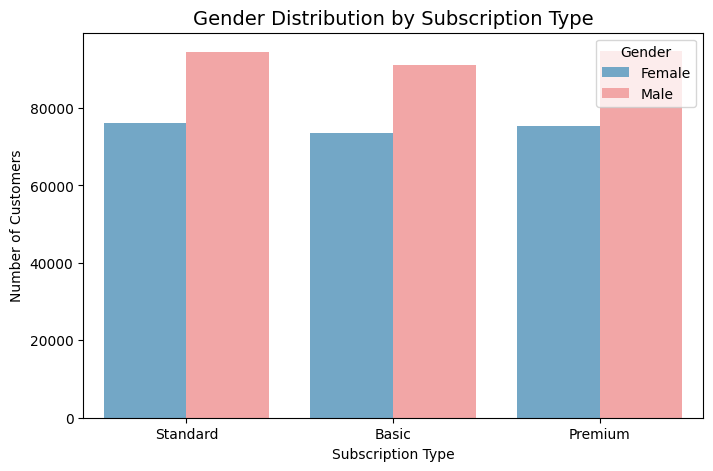

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Subscription Type', hue='Gender', data=df1, palette=['#65aad4','#ff9999'])
plt.title('Gender Distribution by Subscription Type', fontsize=14)
plt.ylabel('Number of Customers')
plt.xlabel('Subscription Type')
plt.show()


In [34]:
df1.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn', 'Age_Quartile'],
      dtype='object')

In [35]:
df2=df1.drop('Age_Quartile',axis=1)
df2

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [36]:
df2['Gender_coded']=pd.get_dummies(df2['Gender'],dtype='int',drop_first=True)
df3=df2.drop('Gender',axis=1)

In [37]:
df3

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_coded
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,0
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,0
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,0
3,58.0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,1
4,23.0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,0
64370,37.0,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,1
64371,25.0,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,1
64372,50.0,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,0


In [38]:
one_hot = pd.get_dummies(df3['Subscription Type'], dtype=int, drop_first=True)
df3 = pd.concat([df3, one_hot], axis=1)
df4=df3.drop('Subscription Type', axis=1)
df4


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Gender_coded,Premium,Standard
0,30.0,39.0,14.0,5.0,18.0,Annual,932.0,17.0,1.0,0,0,1
1,65.0,49.0,1.0,10.0,8.0,Monthly,557.0,6.0,1.0,0,0,0
2,55.0,14.0,4.0,6.0,18.0,Quarterly,185.0,3.0,1.0,0,0,0
3,58.0,38.0,21.0,7.0,7.0,Monthly,396.0,29.0,1.0,1,0,1
4,23.0,32.0,20.0,5.0,8.0,Monthly,617.0,20.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,33.0,12.0,6.0,21.0,Quarterly,947.0,14.0,1.0,0,0,0
64370,37.0,6.0,1.0,5.0,22.0,Annual,923.0,9.0,1.0,1,0,1
64371,25.0,39.0,14.0,8.0,30.0,Monthly,327.0,20.0,1.0,1,1,0
64372,50.0,18.0,19.0,7.0,22.0,Monthly,540.0,13.0,1.0,0,0,1


In [39]:
df5=pd.concat([df4,pd.get_dummies(df4['Contract Length'],dtype='int',drop_first=True)],axis=1)
df5=df5.drop('Contract Length',axis=1)
df5


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_coded,Premium,Standard,Monthly,Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,0,1,1,0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1.0,0,0,0,0,1
64370,37.0,6.0,1.0,5.0,22.0,923.0,9.0,1.0,1,0,1,0,0
64371,25.0,39.0,14.0,8.0,30.0,327.0,20.0,1.0,1,1,0,1,0
64372,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1.0,0,0,1,1,0


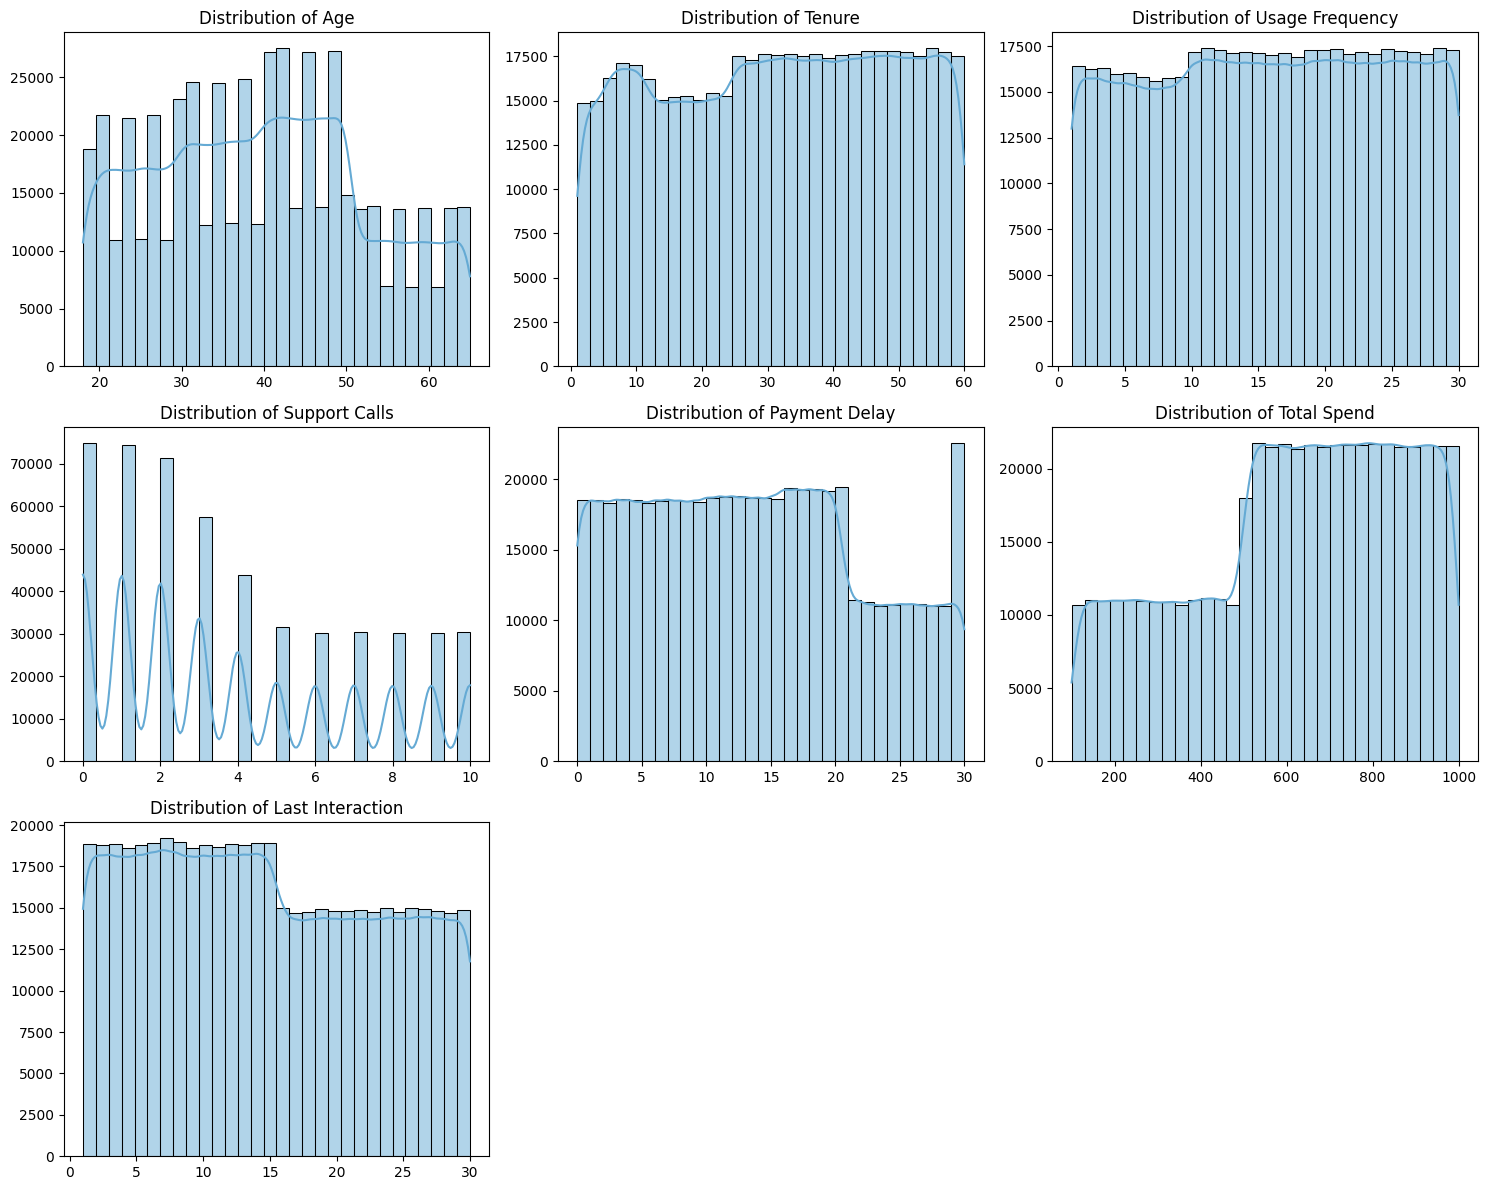

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
            'Payment Delay', 'Total Spend', 'Last Interaction']

# Set up the grid: 3 rows x 3 columns (adjust if needed)
n_rows = 3
n_cols = 3

plt.figure(figsize=(15,12))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df5[feature], bins=30, kde=True, color='#65aad4')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

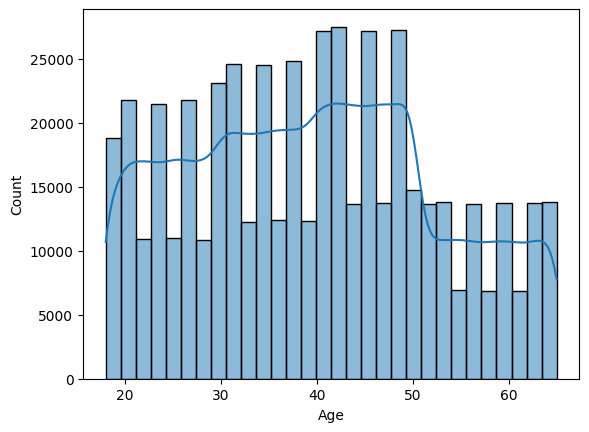

In [41]:
sns.histplot(df5['Age'],bins=30,kde=True)

In [42]:
df5.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_coded,Premium,Standard,Monthly,Quarterly
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203,0.554770,0.336692,0.337743,0.216217,0.390660
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944,0.496992,0.472579,0.472941,0.411664,0.487899
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [44]:
scaler = ColumnTransformer(
    transformers=[
        ('age', StandardScaler(), ['Age']),
        ('tenure', MinMaxScaler(), ['Tenure']),
        ('usage', MinMaxScaler(), ['Usage Frequency']),
        ('support', RobustScaler(), ['Support Calls']),
        ('payment', MinMaxScaler(), ['Payment Delay']),
        ('spend', StandardScaler(), ['Total Spend']),
        ('interaction', MinMaxScaler(), ['Last Interaction'])
    ],
    remainder='passthrough' 
)

In [45]:
scaled=scaler.fit_transform(df5)
scaled_df=pd.DataFrame(scaled,columns=df5.columns)
scaled_df

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_coded,Premium,Standard,Monthly,Quarterly
0,-0.765883,0.644068,0.448276,0.4,0.600000,1.271517,0.551724,1.0,0.0,0.0,1.0,0.0,0.0
1,1.996425,0.813559,0.000000,1.4,0.266667,-0.257105,0.172414,1.0,0.0,0.0,0.0,1.0,0.0
2,1.207194,0.220339,0.103448,0.6,0.600000,-1.773498,0.068966,1.0,0.0,0.0,0.0,0.0,1.0
3,1.443963,0.627119,0.689655,0.8,0.233333,-0.913393,0.965517,1.0,1.0,0.0,1.0,1.0,0.0
4,-1.318345,0.525424,0.655172,0.4,0.266667,-0.012526,0.655172,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505201,0.417963,0.542373,0.379310,0.6,0.700000,1.332662,0.448276,1.0,0.0,0.0,0.0,0.0,1.0
505202,-0.213422,0.084746,0.000000,0.4,0.733333,1.234830,0.275862,1.0,1.0,0.0,1.0,0.0,0.0
505203,-1.160499,0.644068,0.448276,1.0,1.000000,-1.194660,0.655172,1.0,1.0,1.0,0.0,1.0,0.0
505204,0.812578,0.288136,0.620690,0.8,0.733333,-0.326403,0.413793,1.0,0.0,0.0,1.0,1.0,0.0


In [46]:
X=df5.drop('Churn',axis=1)
y=df5['Churn']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),  
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM Classifier": LinearSVC(max_iter=10000),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    
}


In [52]:
results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted')
    }
    print(f"Metrics for {name}:")
    print(f"  Accuracy : {results[name]['Accuracy']:.4f}")
    print(f"  Precision: {results[name]['Precision']:.4f}")
    print(f"  Recall   : {results[name]['Recall']:.4f}")
    print("-" * 40)


Metrics for Logistic Regression:
  Accuracy : 0.8386
  Precision: 0.8390
  Recall   : 0.8386
----------------------------------------
Metrics for Ridge Classifier:
  Accuracy : 0.8396
  Precision: 0.8430
  Recall   : 0.8396
----------------------------------------
Metrics for K-Neighbors Classifier:
  Accuracy : 0.8458
  Precision: 0.8485
  Recall   : 0.8458
----------------------------------------
Metrics for Decision Tree Classifier:
  Accuracy : 0.8805
  Precision: 0.8812
  Recall   : 0.8805
----------------------------------------
Metrics for Random Forest Classifier:
  Accuracy : 0.9344
  Precision: 0.9408
  Recall   : 0.9344
----------------------------------------
Metrics for SVM Classifier:
  Accuracy : 0.8441
  Precision: 0.8457
  Recall   : 0.8441
----------------------------------------
Metrics for XGBClassifier:
  Accuracy : 0.9321
  Precision: 0.9378
  Recall   : 0.9321
----------------------------------------
Metrics for CatBoost Classifier:
  Accuracy : 0.9321
  Precisio

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

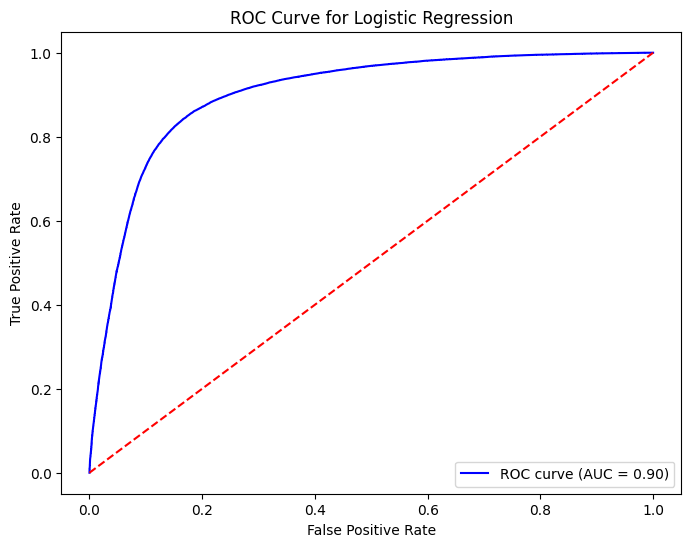

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)

# For binary classification
if y_proba.shape[1] == 2:
    y_score = y_proba[:, 1]
    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

# Take a 50k sample for hyperparameter tuning
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Take 50k sample
sample_indices = X_train_reset.sample(n=50000, random_state=42).index
X_sample = X_train_reset.loc[sample_indices]
y_sample = y_train_reset.loc[sample_indices]
# Top 5 models
top_models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVM Classifier": LinearSVC(max_iter=10000)  # LinearSVC is faster for large data
}

# Parameter grids for each model
param_grids = {
    "Random Forest Classifier": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "XGBClassifier": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    },
    "CatBoost Classifier": {
        'iterations': [100, 200],
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1]
    },
    "Gradient Boosting Classifier": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "SVM Classifier": {
        'C': [0.1, 1, 10]
    }
}

best_models = {}

for name, model in top_models.items():
    print(f"Tuning {name} on 50k samples...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_sample, y_sample)
    
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV Accuracy: {grid.best_score_:.4f}")
    print("-" * 50)

# best_models now contains the tuned models from 50k subset


Tuning Random Forest Classifier on 50k samples...
Best params for Random Forest Classifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.9335
--------------------------------------------------
Tuning XGBClassifier on 50k samples...
Best params for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best CV Accuracy: 0.9326
--------------------------------------------------
Tuning CatBoost Classifier on 50k samples...
Best params for CatBoost Classifier: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best CV Accuracy: 0.9292
--------------------------------------------------
Tuning Gradient Boosting Classifier on 50k samples...
Best params for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV Accuracy: 0.9310
--------------------------------------------------
Tuning SVM Classifier on 50k samples...
Best params for SVM Classifier: {'C': 10}
Best CV Accuracy: 0.8492
------